In [1]:
using HarmonicBalance

In [32]:
@variables ω_x, ω_y, t, T, ω, ψ, F, γ, Δω, α1, α2, α12, η;
@variables x(t), y(t);

In [33]:
#sympy object for the equation of motion

natural_equation = [ d(d(x, t),t) + ω_x^2 * x + γ*d(x,t) + α1*x^3 + 3*α12*y*x^2 + η * x^2 * d(x,t), 
                    d(d(y,t),t) + ω_y^2*y + γ*d(y,t) + α2*y^3 + α12*x^3+ η * y^2 * d(y,t)] 

forces = [F*cos(ω*t), 0]

dEOM = DifferentialEquation(natural_equation - forces, [x, y])

add_harmonic!(dEOM, x, ω) # x will oscillate at ω
add_harmonic!(dEOM, y, 3*ω) # y will oscillate at 3*ω

System of 2 differential equations
Variables:       x(t), y(t)
Harmonic ansatz: x(t) => ω;   y(t) => 3ω;   

α1*(x(t)^3) + (ω_x^2)*x(t) + γ*Differential(t)(x(t)) + η*(x(t)^2)*Differential(t)(x(t)) + 3α12*(x(t)^2)*y(t) + Differential(t)(Differential(t)(x(t))) - F*cos(t*ω) ~ 0
α12*(x(t)^3) + α2*(y(t)^3) + (ω_y^2)*y(t) + γ*Differential(t)(y(t)) + η*(y(t)^2)*Differential(t)(y(t)) + Differential(t)(Differential(t)(y(t))) ~ 0


In [34]:
@time averagedEOM = get_harmonic_equations(dEOM, slow_time=T, fast_time=t)

  6.873588 seconds (8.09 M allocations: 418.544 MiB, 2.71% gc time, 86.92% compilation time)


A set of 4 harmonic equations
Variables: u1(T), v1(T), u2(T), v2(T)
Parameters: α1, ω, γ, ω_x, η, F, α12, α2, ω_y

Harmonic ansatz: 
x(t) = u1*cos(ωt) + v1*sin(ωt)
y(t) = u2*cos(3ωt) + v2*sin(3ωt)

Harmonic equations:

(ω_x^2)*u1(T) + γ*Differential(T)(u1(T)) + (3//4)*α1*(u1(T)^3) + (2//1)*ω*Differential(T)(v1(T)) + γ*ω*v1(T) + (3//4)*α12*(u1(T)^2)*u2(T) + (1//4)*η*ω*(v1(T)^3) + (3//4)*η*(u1(T)^2)*Differential(T)(u1(T)) + (1//4)*η*(v1(T)^2)*Differential(T)(u1(T)) + (3//4)*α1*(v1(T)^2)*u1(T) + (1//4)*η*ω*(u1(T)^2)*v1(T) + (3//2)*α12*u1(T)*v1(T)*v2(T) + (1//2)*η*u1(T)*v1(T)*Differential(T)(v1(T)) - F - (ω^2)*u1(T) - (3//4)*α12*(v1(T)^2)*u2(T) ~ 0

γ*Differential(T)(v1(T)) + (ω_x^2)*v1(T) + (3//4)*α1*(v1(T)^3) + (3//4)*α1*(u1(T)^2)*v1(T) + (1//4)*η*(u1(T)^2)*Differential(T)(v1(T)) + (3//4)*α12*(u1(T)^2)*v2(T) + (3//4)*η*(v1(T)^2)*Differential(T)(v1(T)) + (1//2)*η*u1(T)*v1(T)*Differential(T)(u1(T)) - (ω^2)*v1(T) - (2//1)*ω*Differential(T)(u1(T)) - (1//4)*η*ω*(u1(T)^3) - (3//4)*α12*(v1(T)^2

# solving the algebraic equations

In [35]:
@time problem = Problem(averagedEOM)

  4.155224 seconds (5.04 M allocations: 282.888 MiB, 3.06% gc time, 97.96% compilation time)


4 algebraic equations for steady states
Variables: u1, v1, u2, v2
Parameters: α1, ω, γ, ω_x, η, F, α12, α2, ω_y
Symbolic Jacobian: true


In [53]:
fixed = ParameterList(ω_x => 1, ω_y => 3.1, γ => 8E-3, F => 3E-2, ψ => 0, α1 => 2E-2, α2 => 1, α12 => 1E-2, η => 5E-3)
range = ParameterRange(ω => LinRange(0.95, 1.1,100))

@time soln = HarmonicBalance.get_steady_states(problem, range, fixed, random_warmup=true)

Solving for 100 parameters... 100%|█████████████████████| Time: 0:00:05
  # parameters solved:  100
  # paths tracked:      900
  6.743160 seconds (4.37 M allocations: 206.487 MiB, 1.15% gc time, 16.82% compilation time)


A steady state result for 100 parameter points

Solution branches:   9
   of which real:    3
   of which stable:  2

Classes: stable, physical, Hopf, binary_labels


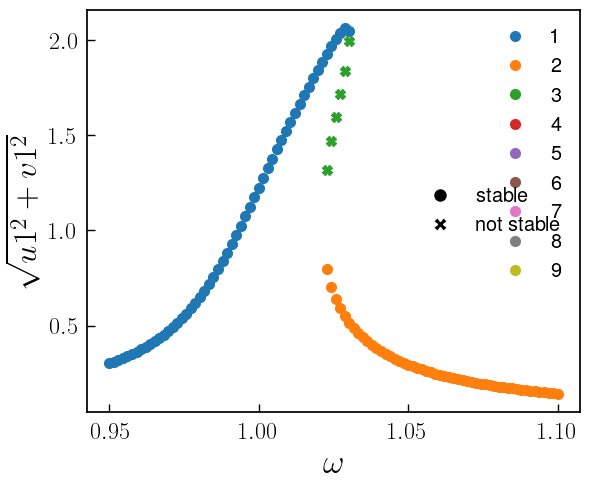

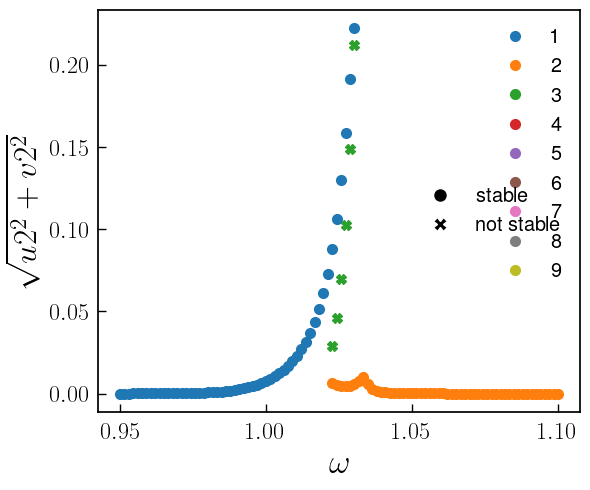

In [54]:
plt = plot_1D_solutions(soln, x="ω", y="sqrt(u1^2 + v1^2)");
plt = plot_1D_solutions(soln, x="ω", y="sqrt(u2^2 + v2^2)");

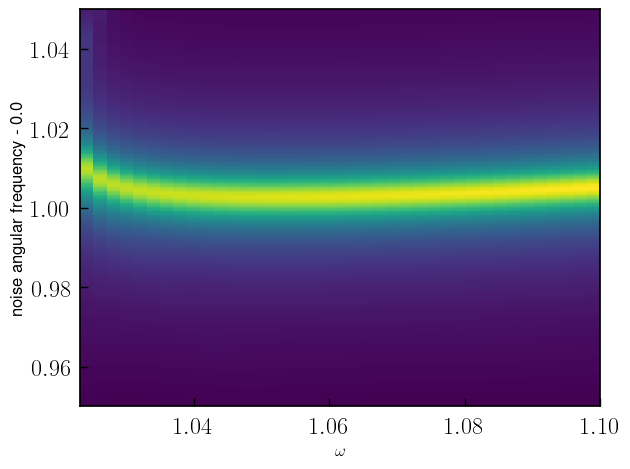

PyObject <matplotlib.image.AxesImage object at 0x7fbb91428c40>

In [44]:
HarmonicBalance.LinearResponse.plot_jacobian_spectrum(soln, x, Ω_range=LinRange(0.95,1.05,300), branch=2)

In [26]:
#HarmonicBalance.LinearResponse.plot_response(soln, LinRange(0.95,1.05,300), branch=2)